In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


In [2]:
# Cargamos el dataframe
df = pd.read_csv('data/train.csv',
        index_col='id',
        parse_dates=['fecha'])

In [3]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
precio,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06
ciudad,372,0.16


Text(0, 0.5, 'Ciudad')

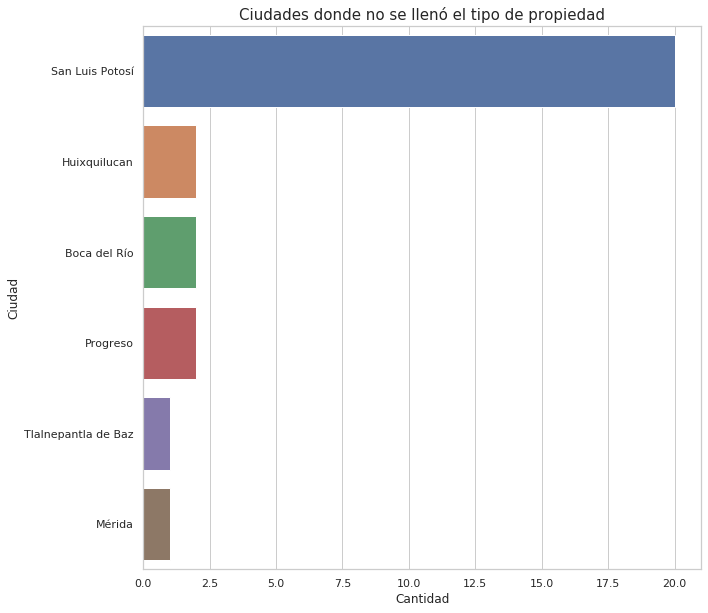

In [4]:
#Quiero descubrir las provincias y las ciudades donde no se lleno el tipo de propiedad
dfTPNull = df[df['tipodepropiedad'].isnull()].groupby(['provincia','ciudad']).size().reset_index()
dfTPNull.rename(columns={0:'cantidad'}, inplace=True)
dfTPNull = dfTPNull.sort_values(by = 'cantidad', ascending=False)
ciudades = list(dfTPNull.ciudad)

plt.figure(figsize=(10, 10))
g = sns.barplot(x=dfTPNull['cantidad'], y=dfTPNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se llenó el tipo de propiedad", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Ciudad", fontsize=12)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Cantidad')

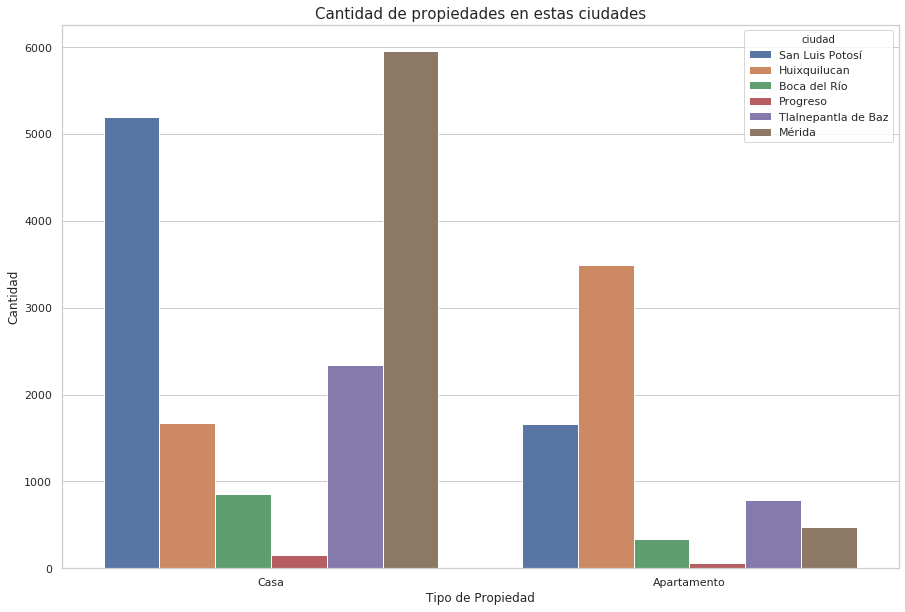

In [5]:
#Quiero ver cual es la propiedad con mayor cantidad que hay en cada una de estas ciudades.
df3 = df.loc[df['ciudad'].isin(ciudades),:]
df3 = df3.groupby(['ciudad','tipodepropiedad']).apply(lambda x: pd.Series(x.shape[0], index=["cantidad"]))
df3.reset_index(inplace=True)
newDf = pd.DataFrame(columns=df3.columns)
for i in ciudades: 
     newDf = newDf.append(df3[df3.ciudad == i].sort_values(by="cantidad", ascending=False)[0:2])

plt.figure(figsize=(15, 10))
g = sns.barplot(x=newDf['tipodepropiedad'], y=newDf['cantidad'], hue=newDf['ciudad'])
g.set_title("Cantidad de propiedades en estas ciudades", fontsize=15)
g.set_xlabel("Tipo de Propiedad", fontsize=12)
g.set_ylabel("Cantidad", fontsize=12)

Text(0, 0.5, 'Provincia')

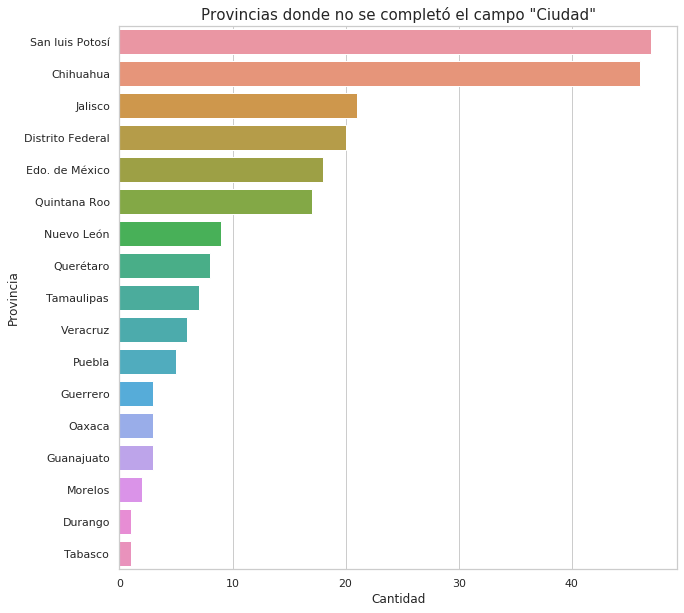

In [6]:
#Quiero ver las provincias donde no completaron el campo:"Ciudad"
dfCiuNull = df[df['ciudad'].isnull()].groupby(['provincia']).size().reset_index()
dfCiuNull.rename(columns={0:'cantidad'}, inplace=True)
dfCiuNull = dfCiuNull.sort_values(by = 'cantidad', ascending=False)
provincia = list(dfCiuNull.provincia)

plt.figure(figsize=(10, 10))
g = sns.barplot(x=dfCiuNull['cantidad'], y=dfCiuNull['provincia'], orient='h')
g.set_title("Provincias donde no se completó el campo \"Ciudad\"", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Provincia", fontsize=12)


#Mejorar grilla y valores para que den sin coma


Text(0, 0.5, 'Provincia')

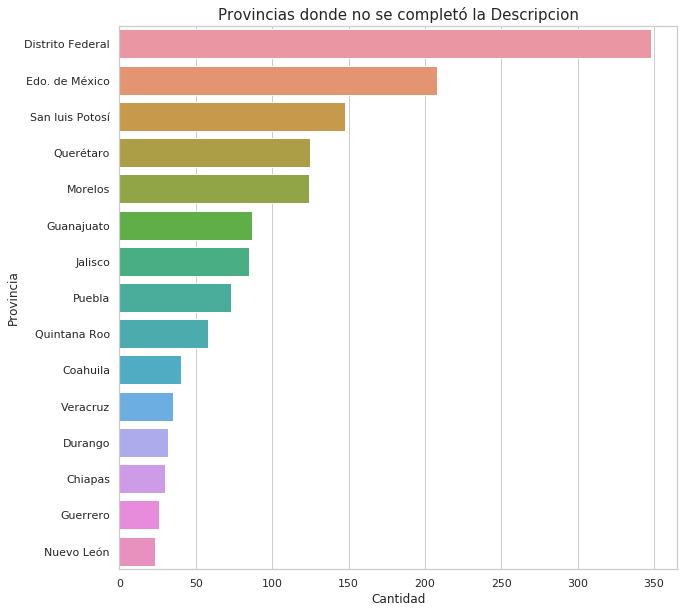

In [7]:
#Quiero ver las ciudades y provincias donde no completaron el campo:"Descripcion"
#Notamos que la provincia con mayor cantidad de omisiones de descripcion es "Distrito federal"
dfDescNull = df[df['descripcion'].isnull()].groupby(['provincia']).size().reset_index()
dfDescNull.rename(columns={0:'cantidad'}, inplace=True)
dfDescNull = dfDescNull.sort_values(by = 'cantidad', ascending=False)[0:15]
provincia = list(dfDescNull.provincia)

plt.figure(figsize=(10, 10))
g = sns.barplot(x=dfDescNull['cantidad'], y=dfDescNull['provincia'], orient='h')
g.set_title("Provincias donde no se completó la Descripcion", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Provincia", fontsize=12)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Ciudad')

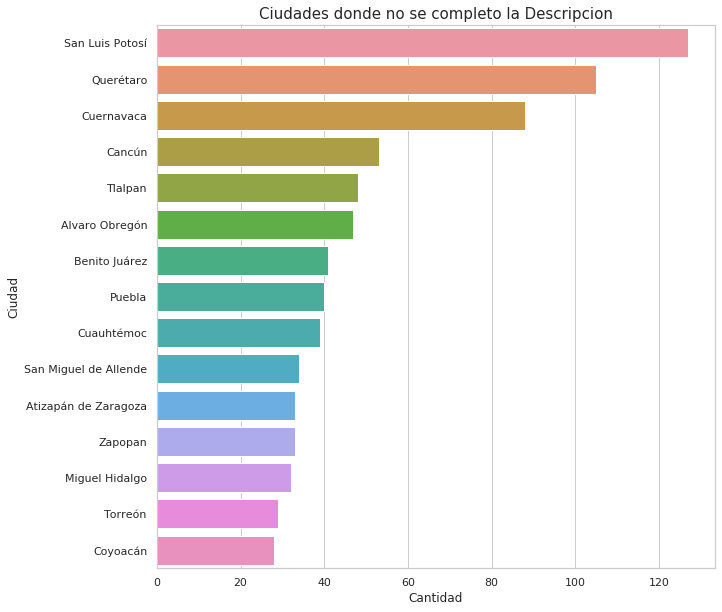

In [8]:
#Quiero ver las ciudades y provincias donde no completaron el campo:"Descripcion"
#Notamos que la ciudad con mayor cantidad de omisiones de descripcion es "San Luis Potosí"
dfDescNull = df[df['descripcion'].isnull()].groupby(['ciudad']).size().reset_index()
dfDescNull.rename(columns={0:'cantidad'}, inplace=True)
dfDescNull = dfDescNull.sort_values(by = 'cantidad', ascending=False)[0:15]
ciudades = list(dfDescNull.ciudad)


plt.figure(figsize=(10, 10))
g = sns.barplot(x=dfDescNull['cantidad'], y=dfDescNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se completo la Descripcion", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Ciudad", fontsize=12)

        ciudad  cantidad
521  Querétaro     31313


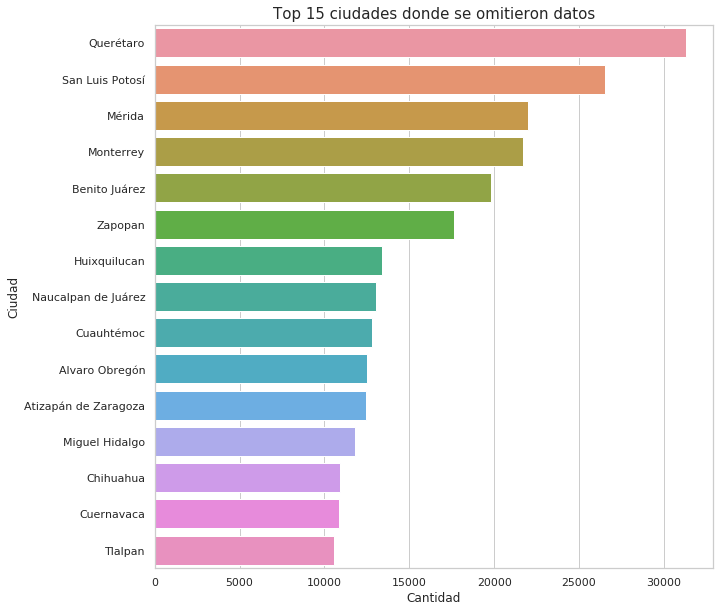

In [18]:
#Comenzamos a darnos cuenta que San Luis Potosí es una de las ciudades que más campos vacios deja.
#Veamos ahora en un marco más general. 
#Vemos que la ciudad que mas datos omitio en realidad es Querétaro.

def sumNuls (x):
    return x.isnull().sum()

dfNullTot = df.groupby('ciudad').apply(sumNuls).apply(np.sum,axis=1).reset_index()
dfNullTot.rename(columns={0:'cantidad'}, inplace=True)
dfNullTot=dfNullTot.sort_values(by='cantidad', ascending=False)[0:15]

plt.figure(figsize=(10, 10))
g = sns.barplot(x=dfNullTot['cantidad'], y=dfNullTot['ciudad'], orient='h')
g.set_title("Top 15 ciudades donde se omitieron datos", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Ciudad", fontsize=12)


In [95]:
# Quiero hacer un grafiquito con el total de publicaciones de cada ciudad de esas 15 que encontre
# que son las que mas nulls tienen
# La cantidad total se multiplica por 23 porque son el total de campos que pueden llenarse por vivienda.
#Vemos que san luis potosi es la ciudad que mayor porcentaje tiene de errores al ingresar datos.
ciudadesMuchoNull = list(dfNullTot.ciudad)

dfMuchoNull = df[df.ciudad.isin(ciudadesMuchoNull)]
dfMuchoNull = dfMuchoNull.groupby('ciudad').size().reset_index().rename(columns={0:'cantidadTotal'})

dfMuchoNull.cantidadTotal=dfMuchoNull.cantidadTotal*23
dfMuchoNull.sort_values(by='cantidadTotal',ascending=False, inplace=True)
dfComparacion = dfMuchoNull.merge(dfNullTot)
dfComparacion['Porcentaje']=dfComparacion['cantidad']/dfComparacion['cantidadTotal']*100
dfComparacion.sort_values(by='Porcentaje',ascending=False,inplace=True)
dfComparacion

,ciudad,cantidadTotal,cantidad,Porcentaje
3,San Luis Potosí,182275,26507,14.54
5,Monterrey,159758,21708,13.59
4,Mérida,164726,21998,13.35
14,Chihuahua,86411,10923,12.64
13,Cuernavaca,86825,10846,12.49
0,Querétaro,290858,31313,10.77
12,Huixquilucan,131514,13416,10.20
10,Atizapán de Zaragoza,133009,12434,9.35
9,Miguel Hidalgo,133285,11793,8.85
8,Naucalpan de Juárez,150742,13066,8.67


Text(0, 0.5, 'Provincia')

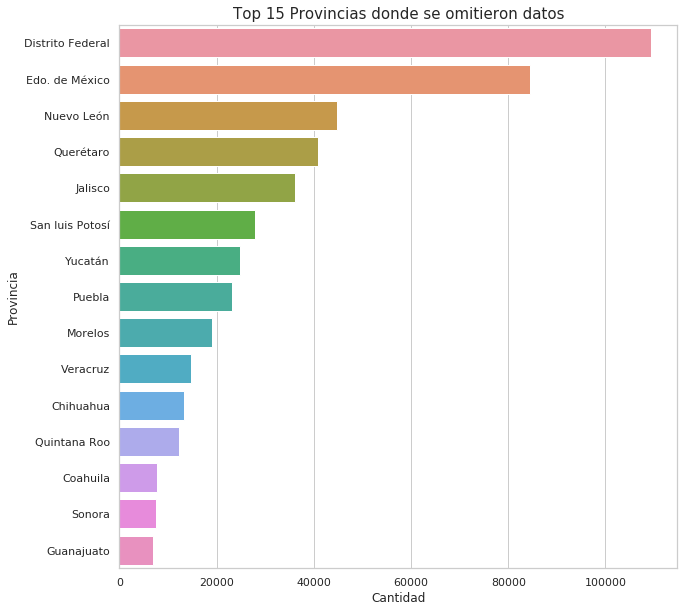

In [10]:
#Veamos que provincia es la que más datos omite:
def sumNuls (x):
    return x.isnull().sum()

dfNullTot = df.groupby('provincia').apply(sumNuls).apply(np.sum,axis=1).reset_index()
dfNullTot.rename(columns={0:'cantidad'}, inplace=True)
dfNullTot=dfNullTot.sort_values(by='cantidad', ascending=False)[0:15]

plt.figure(figsize=(10, 10))
g = sns.barplot(x=dfNullTot['cantidad'], y=dfNullTot['provincia'], orient='h')
g.set_title("Top 15 Provincias donde se omitieron datos", fontsize=15)
g.set_xlabel("Cantidad", fontsize=12)
g.set_ylabel("Provincia", fontsize=12)